<h1><center>Simple Linear and Logistic Regression Model

1. Linear Regression
2. Logistic Regression

## DATASET

I collected this dataset during my 2nd year of study, using the grades I received in **Data Wrangling and Visualization**. The dataset includes grades for 9 assignments, 2 quizzes, a midterm exam, attendance, a project, and bonus points.

Evaluation criteria:

1. Assigments - 20/100
2. Quizzes - 20/100
3. Midterm - 30/100
4. Attendance - 10/100
5. Project - 20/100
6. Bonus points - 6/100 points

### Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import warnings as w
w.filterwarnings('ignore')

In [48]:
df = pd.read_excel("mcm_grades.xlsx")
df.head()

,id,student,attendance,assignment_1,assignment_2,assignment_3,assignment_4,assignment_5,assignment_6,assignment_7,...,assignment_9,assignments_total,bonus_task,quiz_1,quiz_2,midterm,prefinal_grade,project,final_grade,total_grade
0,190109010,Ablay Kundyz,100,100,90,100,103.5,85,35,25,...,70,82.3125,1.0,85,85.0,85,51.4625,96.5,37.8,89.2625
1,190103130,Abzhanov Assylan,100,71,90,80,78.0,70,35,0,...,70,68.0000,0.0,65,100.0,42,32.7000,46.0,25.7,58.4000
2,190107021,Adil Dinassyl,93,43,100,0,0.0,0,0,0,...,0,17.8750,0.0,65,90.0,46,23.8750,45.5,24.9,48.7750
3,190109006,Aibolat Dilnaz,100,57,90,100,70.0,80,50,0,...,0,62.1250,2.5,80,80.0,77,46.0250,97.5,37.5,83.5250
4,190109014,Aitu Nursaule,100,71,70,70,70.0,10,35,50,...,10,48.2500,0.0,78,85.0,50,32.4500,69.5,31.7,64.1500


In [49]:
df.shape

(34, 21)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 34 non-null     int64  
 1   student            34 non-null     object 
 2   attendance         34 non-null     int64  
 3   assignment_1       34 non-null     int64  
 4   assignment_2       34 non-null     int64  
 5   assignment_3       34 non-null     int64  
 6   assignment_4       34 non-null     float64
 7   assignment_5       34 non-null     int64  
 8   assignment_6       34 non-null     int64  
 9   assignment_7       34 non-null     int64  
 10  assignment_8       34 non-null     float64
 11  assignment_9       34 non-null     int64  
 12  assignments_total  34 non-null     float64
 13  bonus_task         34 non-null     float64
 14  quiz_1             34 non-null     int64  
 15  quiz_2             34 non-null     float64
 16  midterm            34 non-nu

In [51]:
df.describe()

,id,attendance,assignment_1,assignment_2,assignment_3,assignment_4,assignment_5,assignment_6,assignment_7,assignment_8,assignment_9,assignments_total,bonus_task,quiz_1,quiz_2,midterm,prefinal_grade,project,final_grade,total_grade
count,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1.901059e+08,90.705882,68.647059,79.264706,68.617647,66.070588,71.058824,45.735294,67.794118,49.926471,31.029412,68.518015,1.338235,81.617647,82.205882,67.705882,43.385221,75.485294,32.300000,75.685221
std,3.028804e+03,24.015815,34.618162,31.983243,36.107596,32.634189,31.983842,36.621164,57.527216,30.664888,35.200280,29.066536,2.036488,24.701877,24.554861,28.119366,15.657030,24.643745,8.124178,22.605969
min,1.901030e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.901032e+08,93.000000,57.000000,70.000000,57.250000,51.075000,70.000000,8.750000,0.000000,50.000000,0.000000,52.975000,0.000000,75.750000,80.000000,47.750000,33.065313,73.875000,30.800000,66.130938
50%,1.901033e+08,100.000000,86.000000,92.500000,80.000000,68.500000,80.000000,35.000000,60.000000,50.000000,5.000000,74.250000,0.000000,85.000000,90.000000,79.000000,47.820625,80.875000,35.150000,82.762500
75%,1.901090e+08,100.000000,98.750000,100.000000,100.000000,88.787500,93.750000,70.000000,100.000000,70.000000,70.000000,87.528125,2.000000,95.000000,96.875000,86.500000,53.537500,91.500000,37.050000,90.442813
max,1.901130e+08,100.000000,100.000000,100.000000,100.000000,120.000000,100.000000,100.000000,150.000000,100.000000,100.000000,117.125000,6.000000,110.000000,100.000000,98.000000,60.000000,100.000000,40.000000,100.000000


In [52]:
# Convert float to integer columns
for i in df.columns:
    if df[str(i)].dtype == 'float64':
        df[str(i)] = df[str(i)].apply(np.int64)

In [53]:
# Check missing values
df.isna().sum()

id                   0
student              0
attendance           0
assignment_1         0
assignment_2         0
assignment_3         0
assignment_4         0
assignment_5         0
assignment_6         0
assignment_7         0
assignment_8         0
assignment_9         0
assignments_total    0
bonus_task           0
quiz_1               0
quiz_2               0
midterm              0
prefinal_grade       0
project              0
final_grade          0
total_grade          0
dtype: int64

In [54]:
# All columns
df.columns

Index(['id', 'student', 'attendance', 'assignment_1', 'assignment_2',
       'assignment_3', 'assignment_4', 'assignment_5', 'assignment_6',
       'assignment_7', 'assignment_8', 'assignment_9', 'assignments_total',
       'bonus_task', 'quiz_1', 'quiz_2', 'midterm', 'prefinal_grade',
       'project', 'final_grade', 'total_grade'],
      dtype='object')

### Preparation inputs and outputs for ML

In [55]:
# define X and y
X = df.drop(['id', 'student', 'assignments_total', 'prefinal_grade', 'final_grade', 'total_grade'], axis=1).values.reshape(-1, 15)
y = df['total_grade']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# determine training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
# input shape
X_train.shape

(23, 15)

In [59]:
# output shape
y_train.shape

(23,)

<h1><center>1. Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [61]:
# fitting and predicting liner regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [62]:
# create error function for model
def run_experiment(model):
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [63]:
# experimential results
run_experiment(linreg)

R^2 :  0.9989049265961034
MAE : 0.4857967412015366
RMSE: 0.5488741555092939


In [66]:
linreg.predict(X_test[:5]), np.array(y_test[:5])

(array([81.69433984, 71.48337034, 85.16156797, 93.76503698, 48.67017463]),
 array([82, 71, 86, 94, 48], dtype=int64))

### Visualization

In [18]:
import matplotlib.pyplot as plt

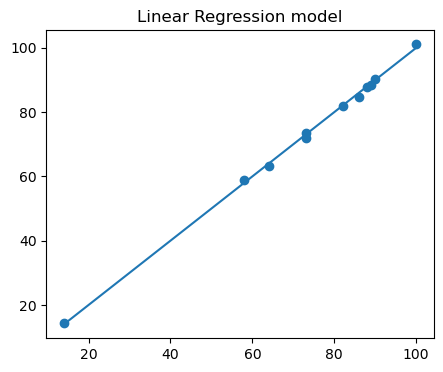

In [19]:
# Model Visualization with matplotlib
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(min(y_test), max(y_test)), np.linspace(min(y_test), max(y_test)))
plt.title("Linear Regression model")
plt.show()

<h1><center>2. Logistic Regression

In [69]:
# Create new column for classification
level = []
for i in df['total_grade']:
    if 100 >= i >= 90:
        level.append('Excellent')
    elif 89 >= i >= 70:
        level.append('Good')
    elif 69 >= i >= 50:
        level.append('Satisfactory')
    elif i < 50:
        level.append('Unsatisfactory')

In [70]:
# Add level column to the dataframe
df['level'] = level
df['level'][:3]

0              Good
1      Satisfactory
2    Unsatisfactory
Name: level, dtype: object

### Convert to categorical data

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
# convert categorical data using LabelEncoder
le = LabelEncoder()
df['level'] = le.fit_transform(df['level'])
df['level'][:5]

0    1
1    2
2    3
3    1
4    2
Name: level, dtype: int32

In [73]:
# create new input and output values
X_new = X
y_new = df['level']

In [74]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# create logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train_new)
logreg.score(X_test, y_test)

0.0

In [78]:
# predicting testing set
logreg.predict(X_test_new), np.array(y_test_new)

(array([1, 0, 1, 0, 1, 1, 3, 1, 1, 2, 0]),
 array([1, 0, 2, 0, 1, 1, 3, 1, 2, 1, 1]))